# Research Questions:
## What customers from this European bank are most likely to churn?
### Correlation between different variables and churn rates.

* How does the churn rate vary across different demographic groups (gender, age)?
* What consumers are most likely to churn based on their credit score?
* What consumers are most likely to churn based on their estimated salary?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as stats

## 1. Data Understanding

In [2]:
df = pd.read_csv('/kaggle/input/bank-churn-modelling/Churn_Modelling.csv')
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [3]:
df.shape

(10000, 14)

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<Axes: ylabel='Frequency'>

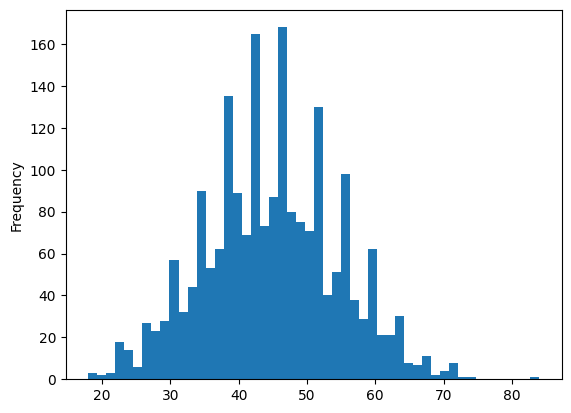

In [7]:
df[df['Exited'] == 1]['Age'].sort_index().plot(kind = 'hist', bins = 50)


## 2. Data Prep
* Dropping irrelevant columns
* Identifying duplicate rows (if any)

In [8]:
# Filter for only customers who still are members
# df = df[df['IsActiveMember'] == 1]
df.shape

(10000, 14)

In [9]:
df.drop([
    'RowNumber',
    'Surname',
    'Tenure',
    'CustomerId'
], axis = 1, inplace = True)

In [10]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df = df[['Gender', 'Age', 'Geography', 'CreditScore', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']]

In [12]:
df.head(3)

,Gender,Age,Geography,CreditScore,Balance,EstimatedSalary,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,Female,42,France,619,0.00,101348.88,1,1,1,1
1,Female,41,Spain,608,83807.86,112542.58,1,0,1,0
2,Female,42,France,502,159660.80,113931.57,3,1,0,1


In [13]:
df.isnull().sum()

Gender             0
Age                0
Geography          0
CreditScore        0
Balance            0
EstimatedSalary    0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
dtype: int64

In [14]:
df.loc[df.duplicated()]

,Gender,Age,Geography,CreditScore,Balance,EstimatedSalary,NumOfProducts,HasCrCard,IsActiveMember,Exited


## 3. Data Analysis
### GENDER:

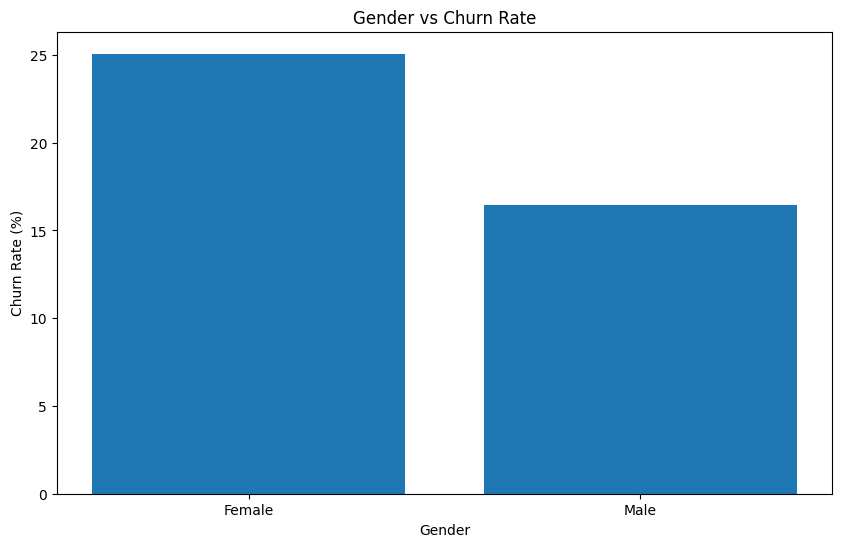

In [15]:
churn_percentages_gender = df.groupby('Gender')['Exited'].mean() * 100

plot_data_gender = pd.DataFrame({
    'Gender': churn_percentages_gender.index,
    'ChurnRate': churn_percentages_gender.values
})

plt.figure(figsize=(10, 6))
plt.bar(plot_data_gender['Gender'], plot_data_gender['ChurnRate'])
plt.title("Gender vs Churn Rate")
plt.xlabel("Gender")
plt.ylabel("Churn Rate (%)")
plt.show()

In [16]:
churn_rate_male = df[df['Gender'] == 'Male']['Exited']
churn_rate_female = df[df['Gender'] == 'Female']['Exited']

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(churn_rate_male, churn_rate_female, equal_var=False)

# Output the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Check significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in churn rates between men and women.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in churn rates between men and women.")


t-statistic: -10.560545107422513
p-value: 6.438643397334933e-26
Reject the null hypothesis: There is a significant difference in churn rates between men and women.


## AGE:

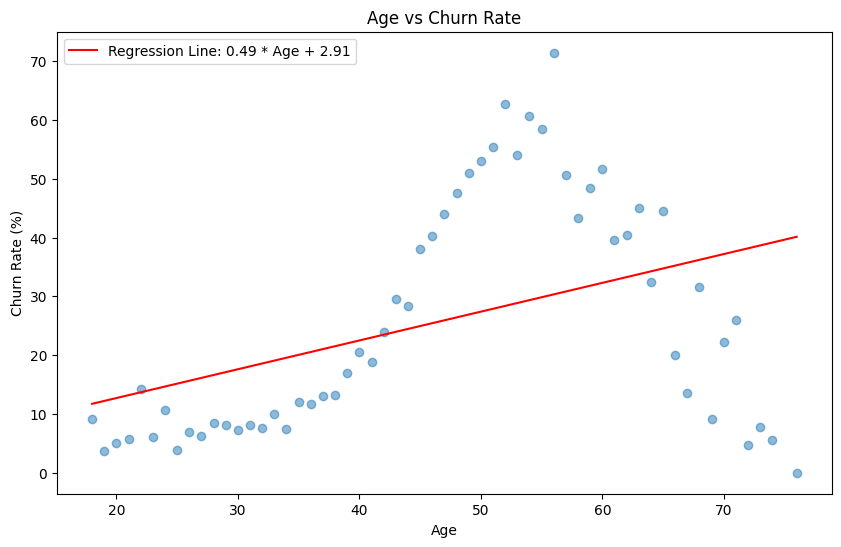

In [17]:
# Filters the df for all ages that appear at least 10 times
indices = df['Age'].value_counts()[df['Age'].value_counts() > 10].index
age_filtered_df = df[df['Age'].isin(indices)]

# Calculate the churn percentage per age
churn_percentages_age = age_filtered_df.groupby('Age')['Exited'].mean() * 100

# Create df with ages and churn percentages
plot_data_age = pd.DataFrame({
    'Age': churn_percentages_age.index,
    'ChurnRate': churn_percentages_age.values
})

x = plot_data_age['Age']
y = plot_data_age['ChurnRate']

# Scatterplot
plt.subplots(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title("Age vs Churn Rate")
plt.xlabel("Age")
plt.ylabel("Churn Rate (%)")

#Regression line
c = np.polyfit(x, y, 1)
y_fit = c[0] * x + c[1]
plt.plot(x, y_fit, '-r', label=f'Regression Line: {c[0]:.2f} * Age + {c[1]:.2f}')
plt.legend()

plt.show()

In [18]:
x = plot_data_age['Age']
y = plot_data_age['ChurnRate']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Output the results
print("Slope (c[0]):", slope)
print("Intercept (c[1]):", intercept)
print("P-value:", p_value)

# Check significance
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant linear relationship between age and churn rate.")
else:
    print("Fail to reject the null hypothesis: There is no significant linear relationship between age and churn rate.")

Slope (c[0]): 0.4896915759748742
Intercept (c[1]): 2.907391263157592
P-value: 0.0010465319181801821
Reject the null hypothesis: There is a significant linear relationship between age and churn rate.


## CREDIT SCORE:
Correlation between credit score (cs) and churn rate

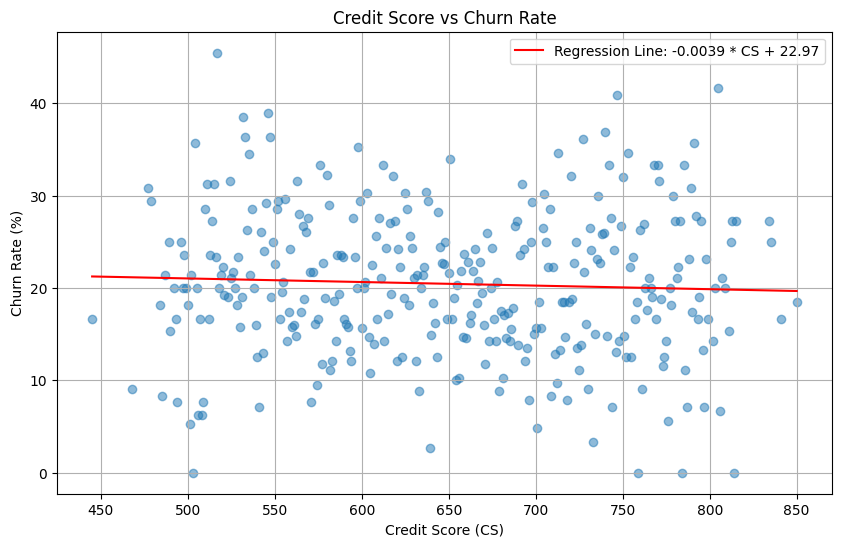

In [19]:
indices = df['CreditScore'].value_counts()[df['CreditScore'].value_counts() > 10].index
cs_filtered_df = df[df['CreditScore'].isin(indices)]


churn_percentages_cs = cs_filtered_df.groupby('CreditScore')['Exited'].mean() * 100

#Create df with CS and churn rates
plot_data_cs = pd.DataFrame({
    'RoundedCreditScore': churn_percentages_cs.index,
    'ChurnRate': churn_percentages_cs.values
})

x = plot_data_cs['RoundedCreditScore']
y = plot_data_cs['ChurnRate']

# Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Credit Score (CS)')
plt.ylabel('Churn Rate (%)')
plt.title('Credit Score vs Churn Rate')
plt.grid(True)

# Regression line
c = np.polyfit(x, y, 1)
y_fit = c[0] * x + c[1]
plt.plot(x, y_fit, '-r', label=f'Regression Line: {c[0]:.4f} * CS + {c[1]:.2f}')
plt.legend()

plt.show()

## SALARY:
Correlation between estimated salary and churn rate

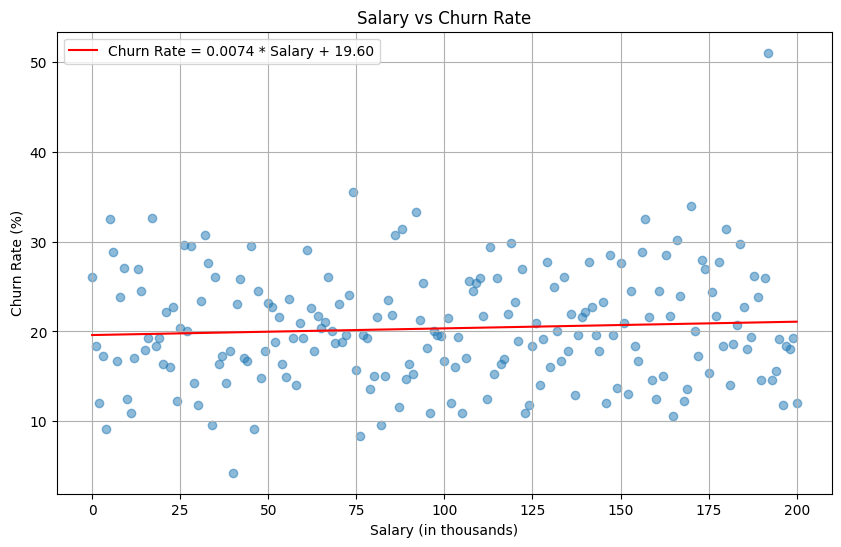

In [20]:
# Round salaries to the nearest thousand
df['RoundedSalary'] = df['EstimatedSalary'].round(-3)
df['SalaryInThousands'] = df['RoundedSalary'] / 1000

# Calculate the percentage of churns for each rounded salary
churn_percentages_salary = df.groupby('SalaryInThousands')['Exited'].mean() * 100

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'RoundedSalary': churn_percentages_salary.index,
    'ChurnRate': churn_percentages_salary.values
})

x = plot_data['RoundedSalary']
y = plot_data['ChurnRate']

# Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Salary (in thousands)')
plt.ylabel('Churn Rate (%)')
plt.title('Salary vs Churn Rate')
plt.grid(True)

# Regression line
c = np.polyfit(x, y, 1)
y_fit = c[0] * x + c[1]
plt.plot(x, y_fit, '-r', label=f'Churn Rate = {c[0]:.4f} * Salary + {c[1]:.2f}')
plt.legend()

plt.show()